In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.autograd import Variable
from torch import Tensor
import torchvision
import torch
import numpy as np

from unet import UNet, UNET, Discriminator
import os
import cv2
from utils import *



# input image distribution

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


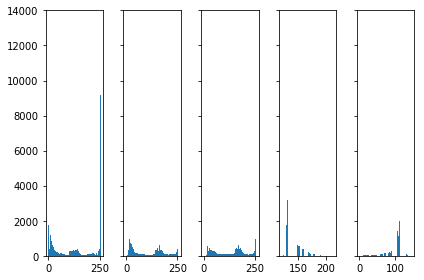

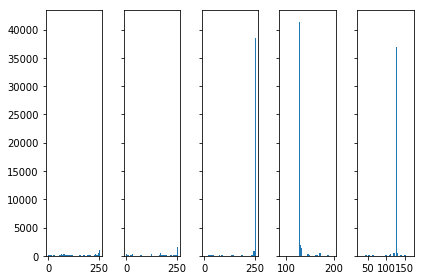

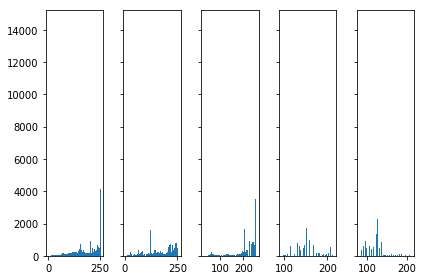

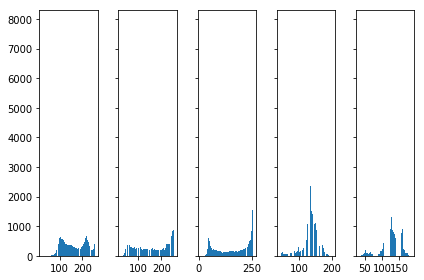

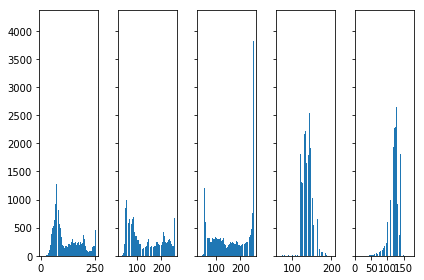

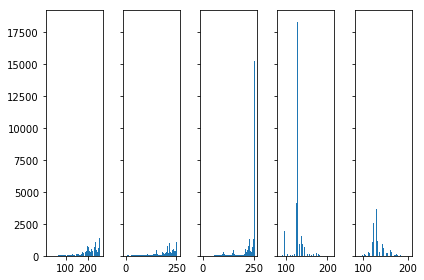

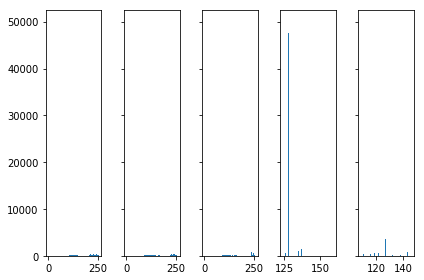

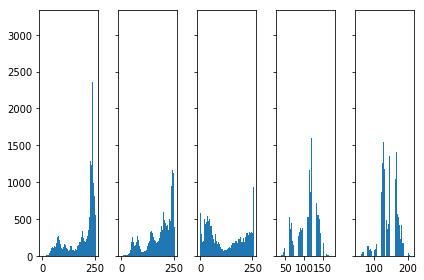

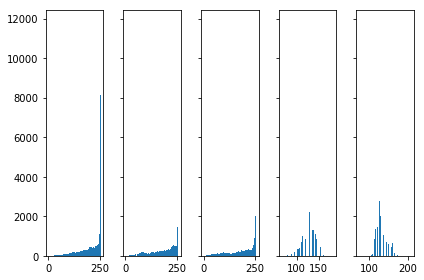

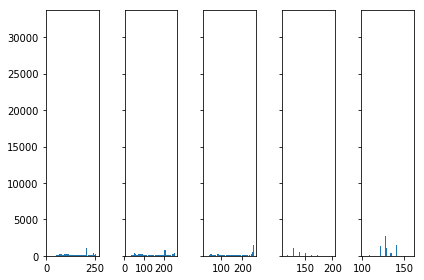

In [2]:
url='resized_image'
for pic in os.listdir(url):
    img = cv2.imread(os.path.join(url,pic))
    UV = RBG_to_YUV(img)
    
    x1=img[:,:,0].reshape((256*256,))
    x2=img[:,:,1].reshape((256*256,))
    x3=img[:,:,2].reshape((256*256,))
    x4=UV[:,:,1].reshape((256*256,))
    x5=UV[:,:,2].reshape((256*256,))
    n_bins_1 = 256
    n_bins_2 = 256
    n_bins_3 = 256
    n_bins_4 = 256
    n_bins_5 = 256

    fig, axs = plt.subplots(1, 5, sharey=True, tight_layout=True)
    axs[0].hist(x1, bins=n_bins_1)
    axs[1].hist(x2, bins=n_bins_2)
    axs[2].hist(x3, bins=n_bins_3)
    axs[3].hist(x4, bins=n_bins_4)
    axs[4].hist(x5, bins=n_bins_5)

    plt.savefig(os.path.join('input_image_distribution',pic))


# colorization_code2 unet with batchnormalization predict UV int8 layer with 128 mean


In [3]:
model = UNet(n_channels=1,n_classes=2)
if os.path.exists('./model/unet2.pth'):
    model.load_state_dict(torch.load('./model/unet2.pth'))
url='grey_image'
for pic in os.listdir(url):
    picture=cv2.imread(os.path.join(url,pic),cv2.IMREAD_GRAYSCALE)
    data=Tensor(picture.reshape(1,1,256,256))
    data=Variable(data)
    target_pred=model(data)
    target_pred=target_pred.data.cpu().numpy().reshape(2,256,256)
    target_pred=target_pred.transpose((1,2,0))
    target_pred=np.concatenate((np.zeros((256,256,1)),target_pred),axis=2)
    target_pred=target_pred.astype(np.uint8)
    
    target_pred[:,:,1]=(target_pred[:,:,1]-np.mean(target_pred[:,:,1]))/(np.var(target_pred[:,:,1]))*4+128
    target_pred[:,:,2]=(target_pred[:,:,2]-np.mean(target_pred[:,:,2]))/(np.var(target_pred[:,:,2]))*4+128

    UV_to_RGB=YUV_to_RGB(target_pred)
    grey_to_RGB = cv2.cvtColor(picture, cv2.COLOR_GRAY2RGB )
    cv2.imwrite(os.path.join('output_image2','int8_'+pic),grey_to_RGB+UV_to_RGB)


torch.Size([1, 1, 256, 256])


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\upsampling.py:180: UserWarning: nn.UpsamplingBilinear2d is deprecated. Use nn.Upsample instead.
  warnings.warn("nn.UpsamplingBilinear2d is deprecated. Use nn.Upsample instead.")


torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])


In [4]:
model = UNet(n_channels=1,n_classes=2)
if os.path.exists('./model/unet2.pth'):
    model.load_state_dict(torch.load('./model/unet2.pth'))
url='grey_image'
for pic in os.listdir(url):
    picture=cv2.imread(os.path.join(url,pic),cv2.IMREAD_GRAYSCALE)

    data=Tensor(picture.reshape(1,1,256,256))
    data=Variable(data)

    target_pred=model(data)
    target_pred=target_pred.data.cpu().numpy().reshape(2,256,256)
    target_pred=target_pred.transpose((1,2,0))

    target_pred=np.concatenate((np.zeros((256,256,1)),target_pred),axis=2)
    picture1=cv2.imread('./output/32472690_p0.png').astype('float32')
    YUV=RBG_to_YUV(picture1)
    YUV[:,:,0]=0
    RBG_UV_picture=YUV_to_RGB(YUV)

    target_pred=target_pred.astype(np.uint8)
    grey_to_RGB = cv2.cvtColor(picture, cv2.COLOR_GRAY2RGB )
    UV_to_RGB=YUV_to_RGB(target_pred)

    grey_to_RGB=grey_to_RGB.astype('float32')
    cv2.imwrite(os.path.join('output_image2','int8_float32_'+pic),grey_to_RGB+UV_to_RGB)


torch.Size([1, 1, 256, 256])


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\upsampling.py:180: UserWarning: nn.UpsamplingBilinear2d is deprecated. Use nn.Upsample instead.
  warnings.warn("nn.UpsamplingBilinear2d is deprecated. Use nn.Upsample instead.")


torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])


# colorization_code3 unet with batchnormalization predict UV float32 layer with 0 mean


In [5]:
if os.path.exists('./unet3.pth'):
    model.load_state_dict(torch.load('./unet3.pth'))
url='grey_image'
for pic in os.listdir(url):
    picture=cv2.imread(os.path.join(url,pic),cv2.IMREAD_GRAYSCALE)
    data=Tensor(picture.reshape(1,1,256,256))
    data=Variable(data)

    target_pred=model(data)
    target_pred=target_pred.data.cpu().numpy().reshape(2,256,256)
    target_pred=target_pred.transpose((1,2,0))

    target_pred=np.concatenate((np.zeros((256,256,1)),target_pred),axis=2)
    target_pred=target_pred.astype('float32')

    grey_to_RGB = cv2.cvtColor(picture, cv2.COLOR_GRAY2RGB )
    UV_to_RGB=YUV_to_RGB(target_pred)

    grey_to_RGB=grey_to_RGB.astype('float32')
    cv2.imwrite(os.path.join('output_image3',pic),grey_to_RGB+UV_to_RGB)



torch.Size([1, 1, 256, 256])


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\upsampling.py:180: UserWarning: nn.UpsamplingBilinear2d is deprecated. Use nn.Upsample instead.
  warnings.warn("nn.UpsamplingBilinear2d is deprecated. Use nn.Upsample instead.")


torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])


# colorization_code4 unet with batchnormalization grey scale predict RGB


In [6]:
model = UNet(n_channels=1,n_classes=3)
if os.path.exists('./unet4.pth'):
    model.load_state_dict(torch.load('./unet4.pth'))
url='grey_image'
for pic in os.listdir(url):
    picture=cv2.imread(os.path.join(url,pic),cv2.IMREAD_GRAYSCALE)


    data=Tensor(picture.reshape(1,1,256,256))
    data=Variable(data)

    target_pred=model(data)
    target_pred=target_pred.data.cpu().numpy().reshape(3,256,256)
    target_pred=target_pred.transpose((1,2,0))

    cv2.imwrite(os.path.join('output_image4',pic),target_pred)


torch.Size([1, 1, 256, 256])


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\upsampling.py:180: UserWarning: nn.UpsamplingBilinear2d is deprecated. Use nn.Upsample instead.
  warnings.warn("nn.UpsamplingBilinear2d is deprecated. Use nn.Upsample instead.")


torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])


# colorization_code5 unet with batchnormalization line sketch predict RGB


In [7]:
model = UNET(n_channels=1,n_classes=3)
if os.path.exists('./unet5.pth'):
    model.load_state_dict(torch.load('./unet5.pth'))
    
url='grey_image'
for pic in os.listdir(url):
    picture=cv2.imread(os.path.join(url,pic),cv2.IMREAD_GRAYSCALE)

    data=Tensor(picture.reshape(1,1,256,256))
    data=Variable(data)

    target_pred=model(data)
    target_pred=target_pred.data.cpu().numpy().reshape(3,256,256)
    target_pred=target_pred.transpose((1,2,0))

    cv2.imwrite(os.path.join('output_image5',pic),target_pred)


# colorization_code6 unet with batchnormalization line sketch predict grey scale


In [8]:
model = UNET(n_channels=1,n_classes=1)
if os.path.exists('./unet6.pth'):
    model.load_state_dict(torch.load('./unet6.pth'))
    
url='grey_image'
for pic in os.listdir(url):
    picture=cv2.imread(os.path.join(url,pic),cv2.IMREAD_GRAYSCALE)
    
    picture=cv2.resize(picture,(256,256))

    data=Tensor(picture.reshape(1,1,256,256))
    data=Variable(data)

    target_pred=model(data)
    target_pred=target_pred.data.cpu().numpy().reshape(256,256)


    cv2.imwrite(os.path.join('output_image6',pic),target_pred)



# colorization_code7 unet with batchnormalization pretrain line sketch predict RGB as generator, convolution network with one linear layout as discriminator


In [9]:
model = UNET(n_channels=1,n_classes=3)
if os.path.exists('./unet7.pth'):
    model.load_state_dict(torch.load('./unet7.pth'))
url='grey_image'
for pic in os.listdir(url):
    picture=cv2.imread(os.path.join(url,pic),cv2.IMREAD_GRAYSCALE)

    picture=cv2.resize(picture,(256,256))

    data=Tensor(picture.reshape(1,1,256,256))
    data=Variable(data)

    target_pred=model(data)
    target_pred=target_pred.data.cpu().numpy().reshape((3,256,256))
    target_pred=target_pred.transpose((1,2,0))

    cv2.imwrite(os.path.join('output_image7',pic),target_pred)


# colorization_code8 unet with batchnormalization line sketch predict grey scale then grey scale predict UV convert back to RGB


In [10]:
model = UNet(n_channels=1,n_classes=2)
if os.path.exists('./unet3.pth'):
    model.load_state_dict(torch.load('./unet3.pth'))
    
url='output_image6'
for pic in os.listdir(url):
    picture=cv2.imread(os.path.join(url,pic),cv2.IMREAD_GRAYSCALE)
    data=Tensor(picture.reshape(1,1,256,256))
    data=Variable(data)

    target_pred=model(data)
    target_pred=target_pred.data.cpu().numpy().reshape(2,256,256)
    target_pred=target_pred.transpose((1,2,0))

    target_pred=np.concatenate((np.zeros((256,256,1)),target_pred),axis=2)
    target_pred=target_pred.astype('float32')

    grey_to_RGB = cv2.cvtColor(picture, cv2.COLOR_GRAY2RGB )
    UV_to_RGB=YUV_to_RGB(target_pred)

    grey_to_RGB=grey_to_RGB.astype('float32')
    cv2.imwrite(os.path.join('output_image8',pic),grey_to_RGB+UV_to_RGB)




torch.Size([1, 1, 256, 256])


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\upsampling.py:180: UserWarning: nn.UpsamplingBilinear2d is deprecated. Use nn.Upsample instead.
  warnings.warn("nn.UpsamplingBilinear2d is deprecated. Use nn.Upsample instead.")


torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])


In [ ]:
from torchviz import make_dot
